<a href="https://colab.research.google.com/github/irfannhkm/2241720230_Machine-Learning_2024/blob/main/Week%204/week04_t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

## Import Library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pathlib import Path
import matplotlib.image as mpimg

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = "/content/drive/MyDrive/Machine Learning/images/training/"
test_dir = "/content/drive/MyDrive/Machine Learning/images/test/"

# Load Data

In [5]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [6]:
# Fungsi untuk mengekstrak histogram dari gambar
def extract_rgb_histogram(img):
    # Jika gambar memiliki 3 channel (RGB), ekstrak setiap channel
    hist_r = cv2.calcHist([img], [0], None, [256], [0, 256])  # Channel Red
    hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])  # Channel Green
    hist_b = cv2.calcHist([img], [2], None, [256], [0, 256])  # Channel Blue

    # Normalisasi histogram
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_b = cv2.normalize(hist_b, hist_b).flatten()

    # Gabungkan histogram dari ketiga channel menjadi satu vektor fitur
    hist = np.hstack([hist_r, hist_g, hist_b])

    return hist


In [7]:
train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)

In [9]:
# Ekstrak fitur histogram dan label dari data pelatihan
X_train = []
y_train = []

for img, label in train_data:
    hist = extract_rgb_histogram(img)
    X_train.append(hist)
    y_train.append(label)

In [10]:
# Ekstrak fitur histogram dan label dari data pengujian
X_test = []
y_test = []

for img, label in test_data:
    hist = extract_rgb_histogram(img)
    X_test.append(hist)
    y_test.append(label)

In [11]:
# Konversi ke numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Membuat model SVM
svm_model = SVC(kernel='linear')

In [14]:
# Melatih model SVM dengan data pelatihan
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
# Memprediksi data pengujian
y_pred = svm_model.predict(X_test)

In [16]:
# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[78  2]
 [ 2 78]]

Classification Report:
              precision    recall  f1-score   support

         day       0.97      0.97      0.97        80
       night       0.97      0.97      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



Akurasi Model:
* Model SVM yang menggunakan fitur histogram RGB berhasil mencapai akurasi 97%. Dari total 160 sampel dalam data pengujian, model mampu mengklasifikasikan 97% dengan benar.

Confusion Matrix:
* True Positives (TP):
"Day" diklasifikasikan dengan benar sebagai "Day" sebanyak 78 kali.
"Night" diklasifikasikan dengan benar sebagai "Night" sebanyak 78 kali.
* False Positives (FP):
2 sampel "Night" diklasifikasikan sebagai "Day".
* False Negatives (FN):
2 sampel "Day" diklasifikasikan sebagai "Night".

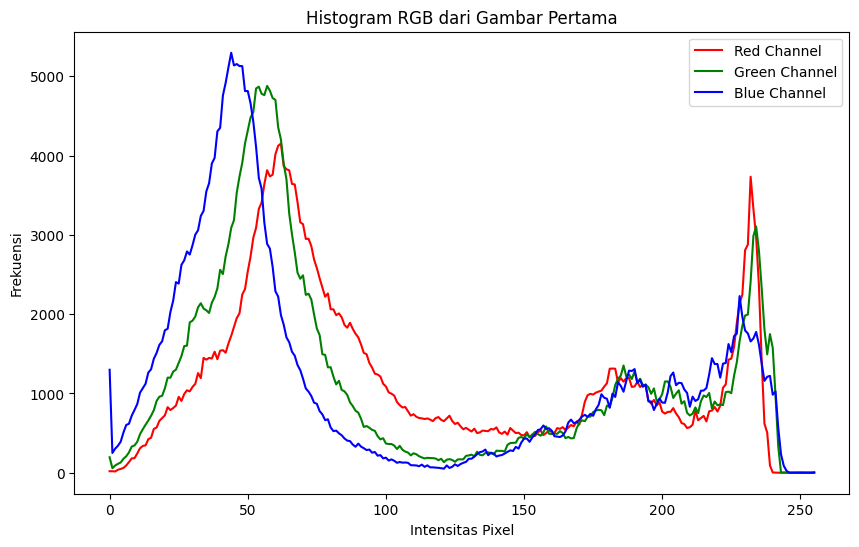

In [17]:
def display_rgb_histogram(img):
    # Hitung histogram untuk setiap channel
    hist_r = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img], [2], None, [256], [0, 256])

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.plot(hist_r, color='r', label='Red Channel')
    plt.plot(hist_g, color='g', label='Green Channel')
    plt.plot(hist_b, color='b', label='Blue Channel')
    plt.title('Histogram RGB dari Gambar Pertama')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()

# Tampilkan histogram RGB dari gambar pertama di dataset pelatihan
display_rgb_histogram(train_data[0][0])

Menampilkan 5 gambar pertama dari dataset pelatihan:


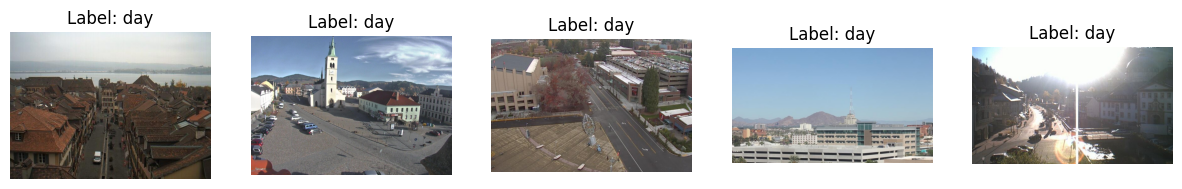

Menampilkan histogram RGB dari 5 gambar pertama:


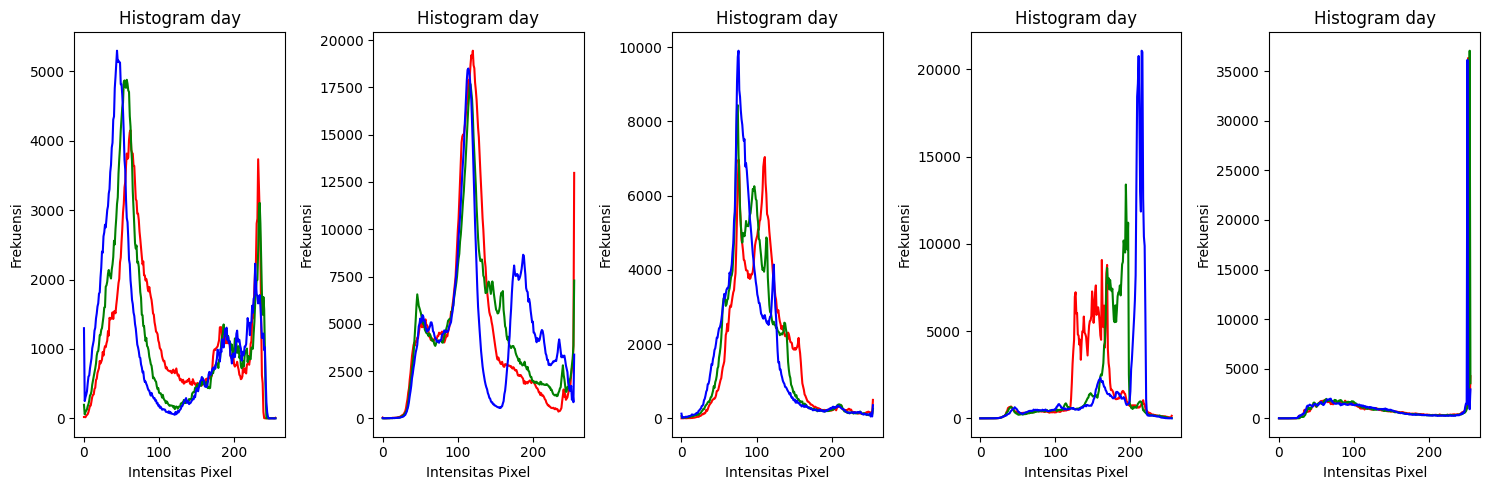

In [21]:
def display_images(img_list, num_images=5):
    plt.figure(figsize=(15, 5))

    for i, (img, label) in enumerate(img_list[:num_images]):  # Ambil beberapa gambar pertama
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)  # Menampilkan gambar RGB
        plt.title(f"Label: {label}")
        plt.axis('off')  # Hilangkan grid/ticks

    plt.show()

# Fungsi untuk menampilkan histogram RGB dari beberapa gambar pertama
def display_rgb_histograms(img_list, num_images=5):
    plt.figure(figsize=(15, 5))

    for i, (img, label) in enumerate(img_list[:num_images]):  # Ambil beberapa gambar pertama
        # Hitung histogram untuk setiap channel RGB
        hist_r = cv2.calcHist([img], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
        hist_b = cv2.calcHist([img], [2], None, [256], [0, 256])

        # Buat subplot untuk histogram setiap gambar
        plt.subplot(1, num_images, i+1)
        plt.plot(hist_r, color='r', label='Red Channel')
        plt.plot(hist_g, color='g', label='Green Channel')
        plt.plot(hist_b, color='b', label='Blue Channel')
        plt.title(f"Histogram {label}")
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Frekuensi')
        plt.tight_layout()

    plt.show()

# Tampilkan 5 gambar pertama dari dataset pelatihan
print("Menampilkan 5 gambar pertama dari dataset pelatihan:")
display_images(train_data, num_images=5)

# Tampilkan histogram RGB dari 5 gambar pertama
print("Menampilkan histogram RGB dari 5 gambar pertama:")
display_rgb_histograms(train_data, num_images=5)

## Kesimpulan:
Model SVM dengan fitur histogram RGB berhasil mengklasifikasikan gambar dengan akurasi yang sangat tinggi (97%). Model ini sangat dapat diandalkan untuk membedakan antara gambar siang dan malam, dengan kesalahan klasifikasi Hanya ada 2 di setiap kelas (2 False Positives dan 2 False Negatives)